In [1]:
import pandas as pd #for scientific computation
import numpy as np #for working with arrays
import matplotlib.pyplot as plt #for creating static, animated, and interactive visualizations
import seaborn as sns # a library that uses Matplotlib underneath to plot graphs
%matplotlib inline
import os

In [2]:
#reads the csv file
df = pd.read_csv('glass classification.csv')

In [3]:
#will give the first 5 entries from the table as output
df.head()

,S.No.,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,One
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,One
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,One
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,One
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,One


In [4]:
#gives the datatype of all the columns of dataset
df.dtypes

S.No.      int64
RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
Type      object
dtype: object

In [5]:
#gives the number of rows and columns as output
df.shape

(214, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S.No.   214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB


In [7]:
#checks whether there is any null value in all the columns
df.isnull().sum()

S.No.    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Type     0
dtype: int64

<ipython-input-8-cc56ba757f0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


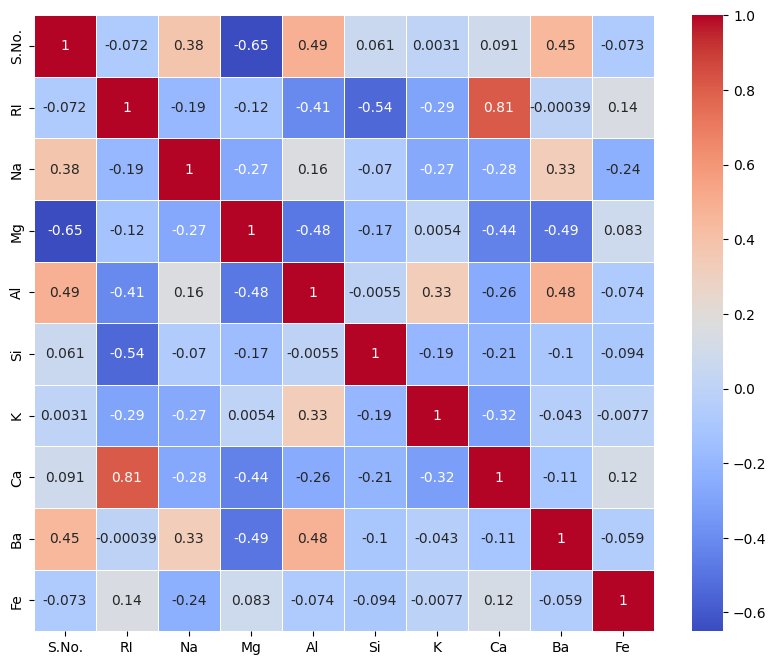

In [8]:
cor = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

We can notice that Ca and K values don't affect Type that much.

Also Ca and RI are highly correlated, this means using only RI is enough.

So we can go ahead and drop Ca, and also K.

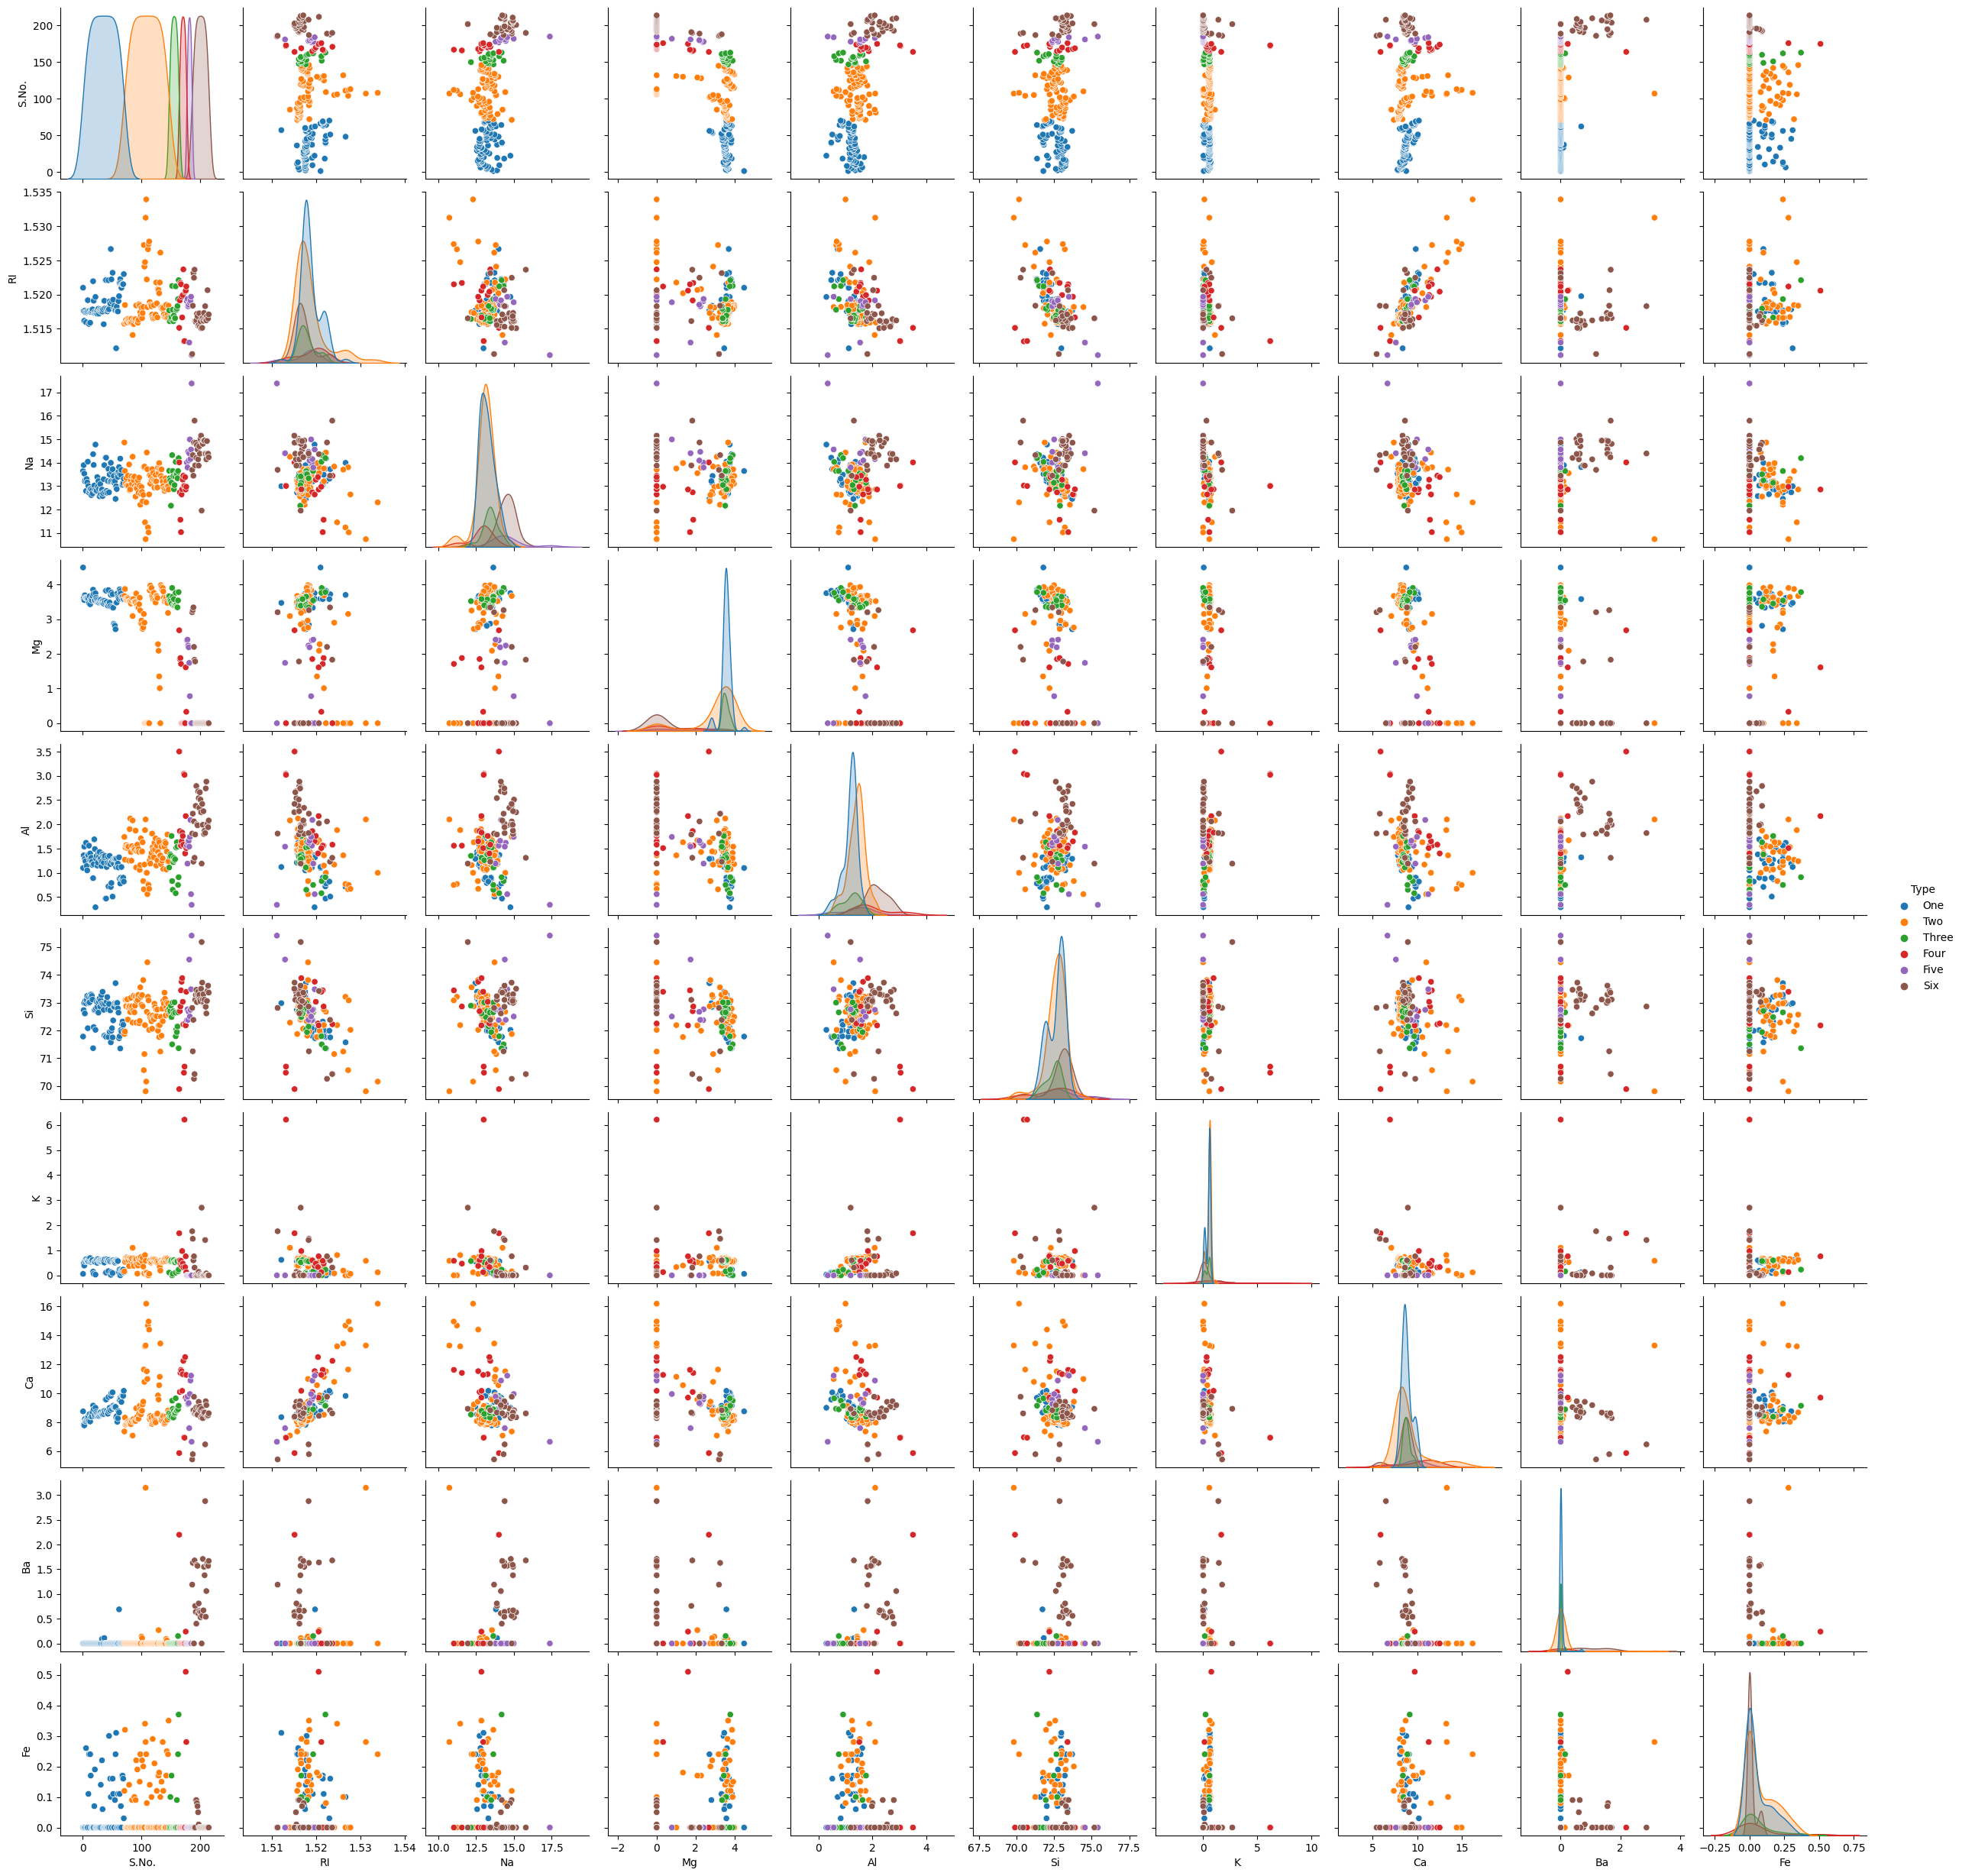

In [10]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Type',axis=1))
Scaled = scaler.transform(df.drop('Type',axis=1))

In [12]:
#converts the data into the standard scalar form
scaledview = pd.DataFrame(Scaled,columns=df.columns[:-1])
scaledview.head()

,S.No.,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#random state is set to 45 so that the data values for the testing and training purpose is always the same
dff = scaledview.drop(['Ca','K'],axis=1) #Removing features - Ca and K
X_train,X_test,y_train,y_test  = train_test_split(dff,df['Type'],test_size=0.3,random_state=45)

In [15]:
accuracy=[]

In [16]:
a=[]
from sklearn.neighbors import KNeighborsClassifier


In [17]:
#KNN algorithm is imported with values of K=5 and metrics is chosen as manhattan
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='manhattan')

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [19]:
#different parameters like confusion matrix,f1 score, accuracy etc are imported from sklearn library
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score

In [20]:
y_pre = knn.predict(X_test)
a.append(accuracy_score(y_true=y_test,y_pred=y_pre)*100)
accuracy.append(np.mean(a))
np.mean(a)

86.15384615384616

In [21]:
#parameters like f1 score, accuracy,precision etc are calculated here
#precision= TP/TP+FP, Recall=TP/TP+FN, f1-score=2.(precision.recall/precision+recall)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

        Five       0.40      1.00      0.57         2
        Four       0.33      1.00      0.50         1
         One       0.91      1.00      0.95        20
         Six       1.00      0.85      0.92        13
       Three       0.00      0.00      0.00         3
         Two       0.92      0.85      0.88        26

    accuracy                           0.86        65
   macro avg       0.59      0.78      0.64        65
weighted avg       0.86      0.86      0.85        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


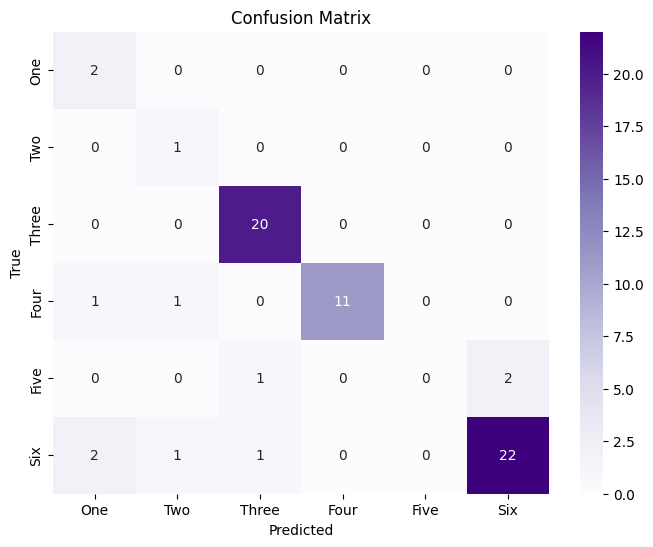

In [24]:
cm = confusion_matrix(y_test,y_pre)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [25]:
#accuracy is calculated
accuracy_score(y_test, y_pre)

0.8615384615384616

In [26]:
from sklearn.model_selection import cross_val_score
k_range = range(1,20)
k_scores = []
error_rate = []
# a measure of the degree of prediction error of a model made with respect to the true model.
for i in k_range:

    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn,dff,df['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())

    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

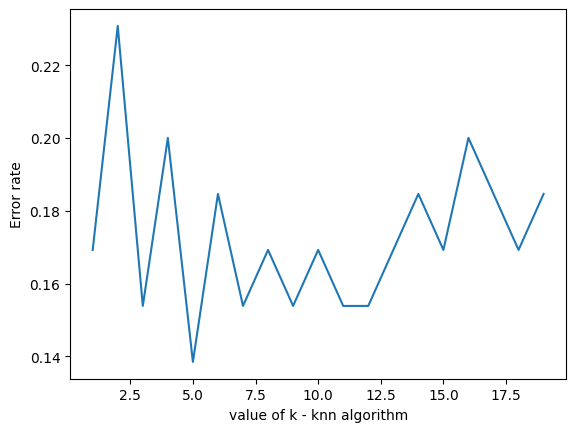

In [27]:
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

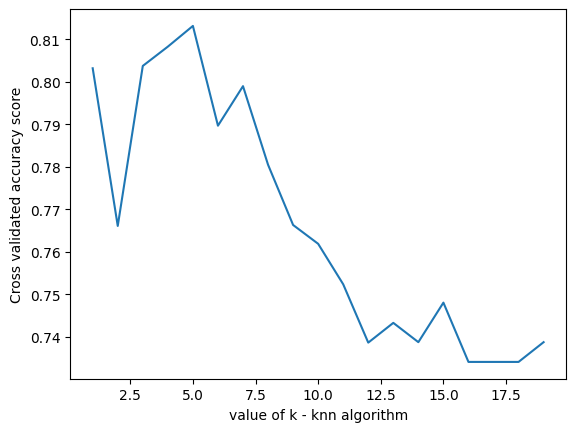

In [28]:
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

In [29]:
#Random Forrest
a=[]
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
a.append(accuracy_score(y_true=y_test,y_pred=predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

98.46153846153847

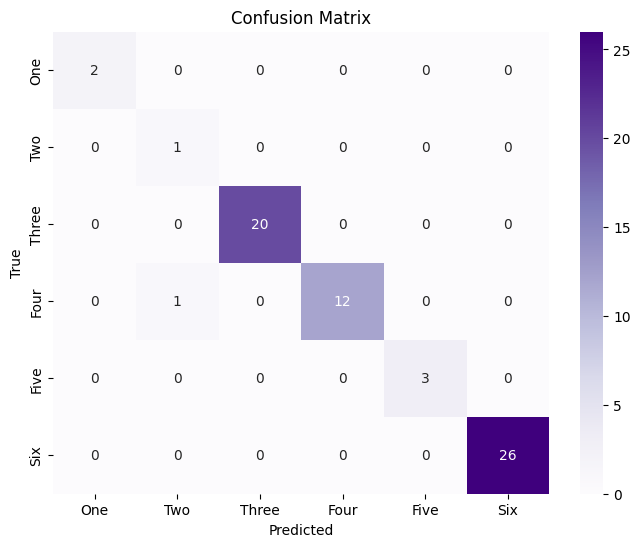

In [32]:
cm = confusion_matrix(y_test,predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [33]:
#Logistic Regression Classifier
a=[]
from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression(max_iter=100)
lgc.fit(X_train,y_train)
predictions=lgc.predict(X_test)
a.append(accuracy_score(y_true=y_test,y_pred=predictions)*100)
accuracy.append(np.mean(a))
np.mean(a)


93.84615384615384

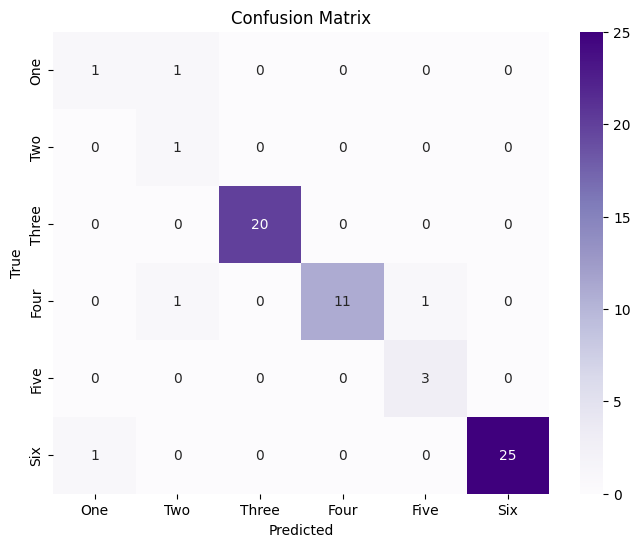

In [34]:
cm = confusion_matrix(y_test,predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [35]:
#Naive Bayes Algorithm
a=[]

from sklearn.naive_bayes import GaussianNB
bnb = GaussianNB()
bnb.fit(X_train,y_train)
predictions=bnb.predict(X_test)
a.append(accuracy_score(y_true=y_test,y_pred=predictions)*100)
accuracy.append(np.mean(a))
np.mean(a)

72.3076923076923

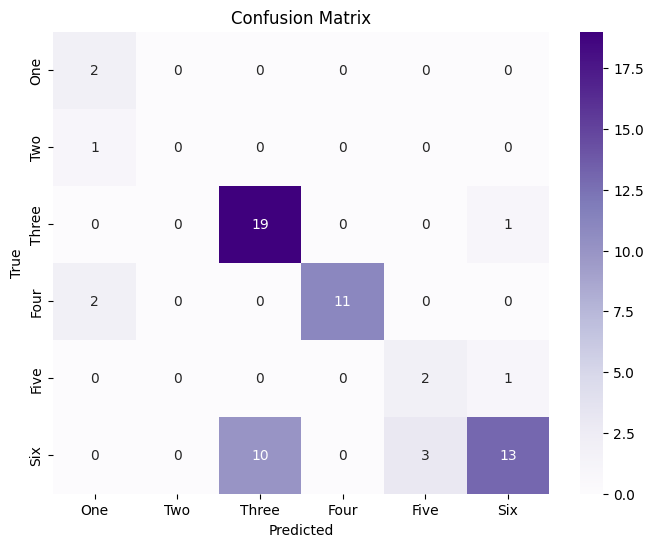

In [36]:
cm = confusion_matrix(y_test,predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [37]:
#Support Vector Machine Classifier
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')

svclassifier.fit(X_train,y_train)
predictions=svclassifier.predict(X_test)
a.append(accuracy_score(y_true=y_test,y_pred=predictions)*100)
accuracy.append(np.mean(a))
np.mean(a)

83.84615384615384

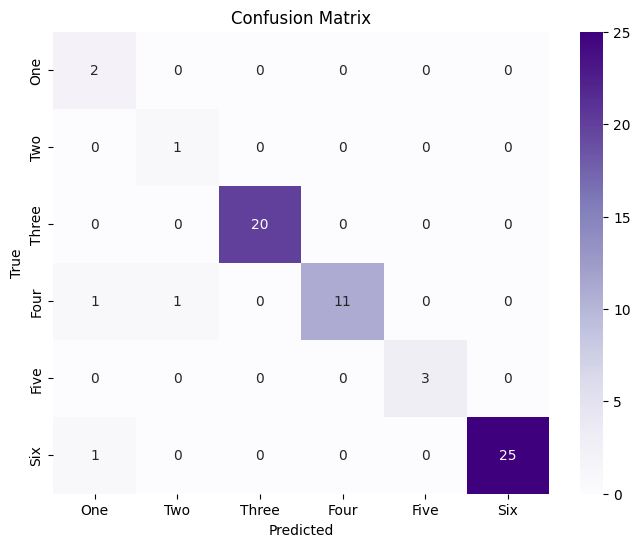

In [38]:
cm = confusion_matrix(y_test,predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

clf1=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=1)
clf2=RandomForestClassifier(n_estimators=50,random_state=1)
clf3=GaussianNB()
clf4=SVC(kernel='linear',probability=True)
clf5=KNeighborsClassifier(n_neighbors=5,p=2,metric='manhattan')

#Ensemble Learning
eclf=VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3),('svc',clf4),('knn',clf5)], voting='soft',weights=[4,5,1,2,3])
for clf, label in zip([clf1,clf2,clf3,clf4,clf5,eclf], ['Logistic Regression','Random Forest', 'Naive Bayes', 'Support Vector Machine', 'K-Nearest-Neighbour','Ensemble']):
  scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]"%(scores.mean()*100,scores.std(),label))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 89.29 (+/- 0.06) [Logistic Regression]
Accuracy: 95.95 (+/- 0.03) [Random Forest]
Accuracy: 72.48 (+/- 0.08) [Naive Bayes]
Accuracy: 91.29 (+/- 0.03) [Support Vector Machine]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 88.57 (+/- 0.07) [K-Nearest-Neighbour]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 95.29 (+/- 0.04) [Ensemble]


In [40]:
accuracy

[86.15384615384616,
 98.46153846153847,
 93.84615384615384,
 72.3076923076923,
 83.84615384615384]

In [41]:
accuracy.append(95.29)
accuracy


[86.15384615384616,
 98.46153846153847,
 93.84615384615384,
 72.3076923076923,
 83.84615384615384,
 95.29]

In [42]:
method=['k-Nearest-Neighbour','Random Forrest', 'Logistic Regression','Gaussian Naive Bayes','Support Vectore Classifier','Ensemble Voting']

In [43]:
table=pd.DataFrame(accuracy,method,columns=['Accuracy'])

In [44]:
table


,Accuracy
k-Nearest-Neighbour,86.153846
Random Forrest,98.461538
Logistic Regression,93.846154
Gaussian Naive Bayes,72.307692
Support Vectore Classifier,83.846154
Ensemble Voting,95.290000


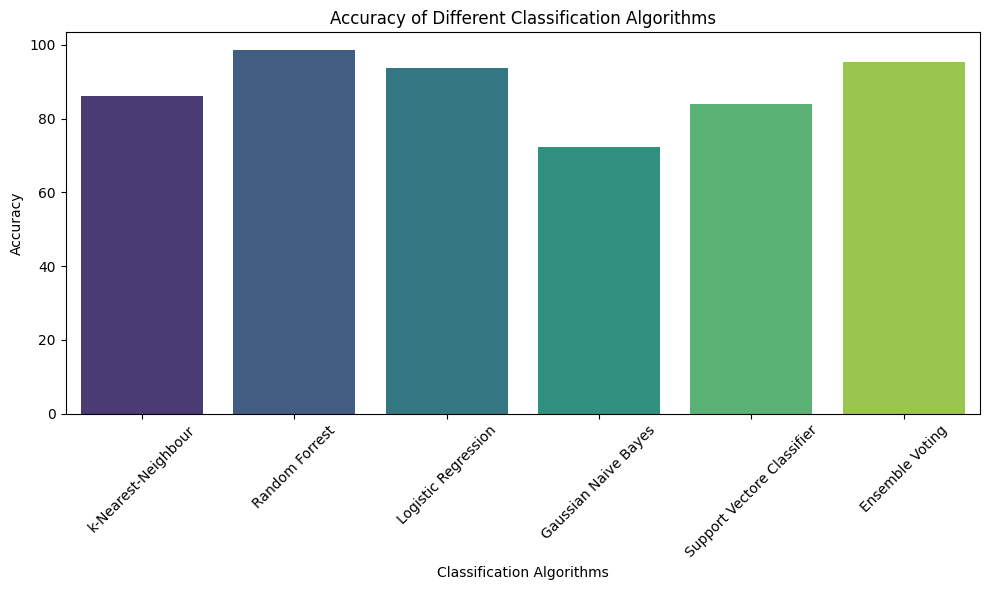

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=method, y=accuracy, palette='viridis')

# Add labels and title
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Algorithms')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()